# Import Package và dữ liệu

In [2]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/HuyNLQ-MSB23067/Python4EngineersExercises/main/train.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import time
import math
from datetime import datetime

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Assignment

### Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.

#### Tiền xử lý dữ liệu

In [6]:
# Tạo cột mới "Tháng order" và "Tháng ship"
data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d/%m/%Y")
data['Order Month'] = pd.DatetimeIndex(data['Order Date']).month
data['Order Year'] = pd.DatetimeIndex(data['Order Date']).year
data['Order Period'] = data['Order Date'].dt.to_period('M')

data['Ship Date'] = pd.to_datetime(data['Ship Date'], format="%d/%m/%Y")
data['Ship Month'] = pd.DatetimeIndex(data['Ship Date']).month
data['Ship Year'] = pd.DatetimeIndex(data['Ship Date']).year
data['Ship Period'] = data['Ship Date'].dt.to_period('M')

In [7]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Order Month,Order Year,Order Period,Ship Month,Ship Year,Ship Period
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,11,2017,2017-11,11,2017,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,2017-11,11,2017,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,2017-06,6,2017,2017-06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,2016-10,10,2016,2016-10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,10,2016,2016-10,10,2016,2016-10


In [8]:
df_sales_by_months = data.groupby(['Order Period'])['Sales'].sum()
df_sales_last_3_months = data.groupby(['Order Period'])['Sales'].sum().tail(3)

#### Biểu độ biến động doanh số theo tháng

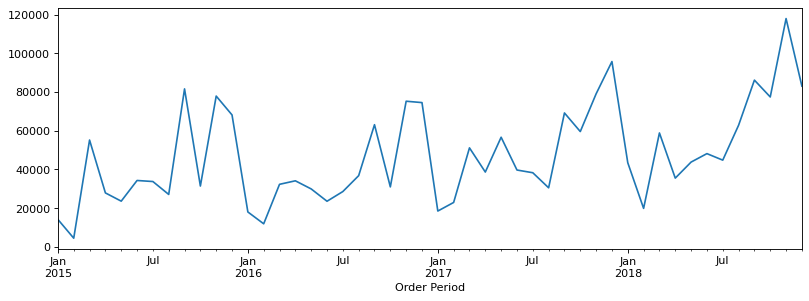

In [9]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
(df_sales_by_months).plot()
plt.show()

#### Doanh thu 3 tháng gần nhất

In [10]:
df_sales_last_3_months

Order Period
2018-10     77448.1312
2018-11    117938.1550
2018-12     83030.3888
Freq: M, Name: Sales, dtype: float64

### Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?

#### Tiền xử lý dữ liệu

In [11]:
# Tạo cột mới "Quý order" và "Quý ship"
data['Order Quarter'] = data['Order Date'].dt.to_period('Q')
data['Ship Quarter'] = data['Ship Date'].dt.to_period('Q')

In [12]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Order Month,Order Year,Order Period,Ship Month,Ship Year,Ship Period,Order Quarter,Ship Quarter
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,11,2017,2017-11,11,2017,2017-11,2017Q4,2017Q4
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,11,2017,2017-11,11,2017,2017-11,2017Q4,2017Q4
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,6,2017,2017-06,6,2017,2017-06,2017Q2,2017Q2
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,10,2016,2016-10,10,2016,2016-10,2016Q4,2016Q4
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,10,2016,2016-10,10,2016,2016-10,2016Q4,2016Q4


In [13]:
df = data.groupby(['Order Quarter'])['Sales'].sum().reset_index(name='Sales')

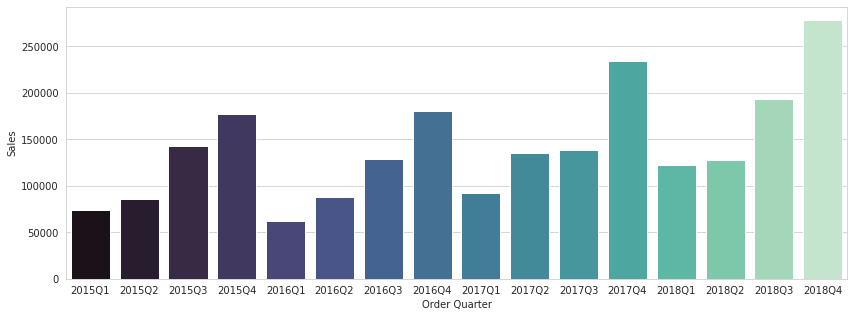

In [14]:
import seaborn as sns
sns.set_style('whitegrid')
sns.axes_style(style='ticks')
fig, (ax1) = plt.subplots(1,1, figsize=(14,5))

sns.barplot(x = 'Order Quarter', y='Sales', data=df, 
            palette='mako', ax=ax1)

#plt.xticks(rotation=90)
plt.show()



> => Quý 4 năm 2018 có tổng doanh thu cao nhất



### Tính thời gian trung giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.

#### Tiền xử lý dữ liệu

In [15]:
df = data.copy()
df['Shipping Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df = df.groupby(['Order Period'])['Shipping Days'].mean()
#df = df.groupby(['Order Period'])['Shipping Days'].mean().reset_index(name='Shipping Days')
df

Order Period
2015-01    4.194805
2015-02    4.173913
2015-03    3.961039
2015-04    4.015385
2015-05    3.801653
2015-06    4.213740
2015-07    3.845070
2015-08    4.089041
2015-09    4.056180
2015-10    3.358491
2015-11    4.248366
2015-12    3.959854
2016-01    4.736842
2016-02    4.218750
2016-03    3.765625
2016-04    4.333333
2016-05    4.020979
2016-06    4.162791
2016-07    3.786765
2016-08    3.955696
2016-09    4.340351
2016-10    3.609756
2016-11    3.978193
2016-12    3.938907
2017-01    4.101124
2017-02    3.469880
2017-03    3.503106
2017-04    4.452381
2017-05    3.877828
2017-06    3.413265
2017-07    3.836735
2017-08    4.331429
2017-09    3.977077
2017-10    4.203125
2017-11    3.948087
2017-12    4.014793
2018-01    4.062937
2018-02    4.355769
2018-03    3.578059
2018-04    3.860000
2018-05    3.725000
2018-06    4.080851
2018-07    4.130045
2018-08    4.042056
2018-09    3.693157
2018-10    3.996599
2018-11    3.800439
2018-12    4.028322
Freq: M, Name: Shipping Day

#### Vẽ biểu đồ

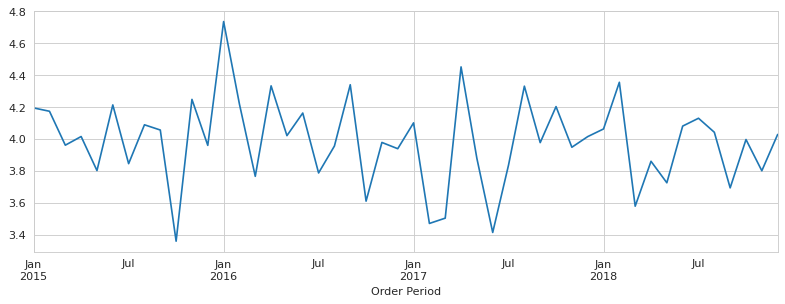

In [16]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
(df).plot()
plt.show()

### Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.

#### Tiền xử lý dữ liệu

In [17]:
df = data.copy()
df = df.groupby(['City'])['Sales'].sum().reset_index(name='Sales').sort_values(by=['Sales'])
df

,City,Sales
1,Abilene,1.392
140,Elyria,1.824
221,Jupiter,2.064
368,Pensacola,2.214
352,Ormond Beach,2.808
...,...,...
372,Philadelphia,108841.749
436,San Francisco,109041.120
450,Seattle,116106.322
265,Los Angeles,173420.181


#### Vẽ biểu đồ

In [18]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

fig = px.pie(df, values='Sales', names='City', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

> => Các thành phố có doanh thu cao nhất: New York City, Los Angeles, Seattle
> => Các thành phố có doanh thu thấp nhất: Abilene, Elyria, Jupiter

### Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua.

#### Tiền xử lý dữ liệu

In [19]:
df = data.copy()
df = df.groupby(['State'])['Sales'].sum().reset_index(name='Sales').sort_values(by=['Sales'])
df

,State,Sales
32,North Dakota,919.9100
46,West Virginia,1209.8240
17,Maine,1270.5300
39,South Dakota,1315.5600
48,Wyoming,1603.1360
7,District of Columbia,2865.0200
14,Kansas,2914.3100
10,Idaho,4382.4860
13,Iowa,4443.5600
29,New Mexico,4783.5220


#### Vẽ biểu đồ 

In [20]:
fig = px.pie(df, values='Sales', names='State', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

#### Trung bình doanh số 5 bang đứng đầu

In [21]:
top_5 = df.tail(5)
top_5['Sales'].mean()

234544.72853999998

### Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).

In [22]:
df = data.copy()
df = df.groupby(['Region', 'State'])['Sales'].sum().reset_index(name='Sales') \
        .sort_values(by=['Sales'], ascending=False).groupby('Region').first() \
        .reset_index()
df

,Region,State,Sales
0,Central,Texas,168572.5322
1,East,New York,306361.1470
2,South,Florida,88436.5320
3,West,California,446306.4635


### Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.

In [23]:
df = data.copy()
df = df.groupby(['Product ID'])['Sales'].sum().reset_index(name='Sales') \
        .sort_values(by=['Sales'], ascending=False)
df.head(3)

,Product ID,Sales
1613,TEC-CO-10004722,61599.824
776,OFF-BI-10003527,27453.384
1641,TEC-MA-10002412,22638.480


In [24]:
df = data.copy()
df = df.groupby(['Product ID'])['Product ID'].count().reset_index(name='Count') \
        .sort_values(by=['Count'], ascending=False)
df.head(3)

,Product ID,Count
1144,OFF-PA-10001970,19
1568,TEC-AC-10003832,18
295,FUR-FU-10004270,16


### Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category.

#### Tiền xử lý dữ liệu

In [25]:
df = data.copy()
df = df.groupby(['Category'])['Sales'].sum().reset_index(name='Sales')
df

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


#### Vẽ biểu đồ

In [28]:
fig = px.pie(df, values='Sales', names='Category', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()